# Decision Trees
Decision tree algorithms can be considered as iterative, top-down construction method for the hypothesis (classifier). You can picture a decision tree as a hierarchy of decisions, which are forking or dividing a dataset into subspaces. 

Decision trees can represent any **Boolean (binary) function** (splits categorical features into binary ones), and the hypothesis space being searched is the entire space of Boolean functions. However, the critical challenge in machine learning is whether an algorithm can learn/find the "right" function or a good approximation within that subspace being searched.

Considering only binary (or Boolean) features, at each node, there are $2^m$ potential splits to be evaluated given that the dataset has m features. Decision tree algorithms search the hypothesis space greedily over all possible trees; an exhaustive search is not feasible because of the exponential nature of the problem. i.e., assume that we have m Boolean features, then there are $2^m$ potential feature combinations. 


## Terminology

[<img src="https://www.researchgate.net/profile/Mahdi_Esfahanian/publication/309796249/figure/fig10/AS:427250085568513@1478875766107/Components-of-a-decision-tree-structure.png">](https://www.researchgate.net/profile/Mahdi_Esfahanian/publication/309796249/figure/fig10/AS:427250085568513@1478875766107/Components-of-a-decision-tree-structure.png)

> - **Root node:** no incoming edge, zero, or more outgoing edges. 
- **Internal node:** one incoming edge, two (or more) outgoing edges. 
- **Leaf node:** each leaf node is assigned a class label if nodes are pure; otherwise, the class label is determined by majority vote.
- **Parent and child nodes:** If a node is split, we refer to that given node as the parent node, and the resulting nodes are called child nodes.

### In the context of Machine Learning
We can categorise decision trees as follows: 
> -   **Supervised learning algorithm**: classification and regression 
-   **Optimisation method**: combinatorial -> greedy search 
-   **Eager** learning algorithm 
-   **Batch** learning algorithm (it means that it cannot learn one example at a time) 
-   **Nonparametric** model (there are no model parameters to fit, unlike e.g., linear regression) 
-   **Deterministic** (vs. stochastic)

### Decision Trees & Rule-based Learning
Typically, can be thought of as **Rule-sets**
-   Makes it more **explainable.**
-   Intuitively, can be thought as nested "if-else" rules. 
-   Rule = conjunction of conditions eg. Rule 1 = (if x = 1) $\cap$ (if y = 2) $\cap ...$
-   Join multiple rules = set of rules, which can be applied to predict the target value of a training example or test instance
-   Each leaf node is a rule

However, the other way around, it is not possible to always build a decision tree from a set of rules.

-   Evaluating a rule set is much more expensive than evaluating a tree, where we only have to go to one single branch. 
-   Rulesets can have multiple answers if we are not careful. 
-   While rules are more expressive or flexible, they are more prone to overfitting, because they have a larger hypothesis space than decision trees.


## Decision Tree Algorithm
The process of growing a decision tree can be expressed as a **recursive algorithm** as follows:

1. Pick a feature such that when parent node is split, it results in the largest information gain (ie. stop if Information gain is positive).

2. Stop if child nodes are pure or no improvement in class purity can be made. *Note: Purity means all training examples at that node belong to the same class*

3.  Go back to step 1 for each of the two child nodes.

```
GenerateTree(D): 

if y=1∀⟨x,y⟩∈D or y=0 ∀⟨x,y⟩∈D): 
> return Tree

else:
> Pick best feature x_j:
- D_0 at Child_0 :x_j =0 ∀⟨x,y⟩∈D
- D_1 at Child_1 :x_j =1 ∀⟨x,y⟩∈D

return Node(x_j,GenerateTree(D_0),GenerateTree(D_1)
```

Assume a perfectly balanced binary decision tree.

[<img src="https://www.researchgate.net/profile/Jose_Sa3/publication/303773171/figure/fig2/AS:391407152975874@1470330145270/a-describes-the-components-of-a-decision-tree-the-Nodes-represent-the-possible.png">](https://www.researchgate.net/profile/Jose_Sa3/publication/303773171/figure/fig2/AS:391407152975874@1470330145270/a-describes-the-components-of-a-decision-tree-the-Nodes-represent-the-possible.png)

### Key takeaways

$n$ = no. of terminal/leaf nodes = 4 

$d$ = depth of tree = 2 

$n = 2^d \quad d = log_2n $

no. of splitting nodes = total no. of nodes - leaf nodes = $(2n-1) - n = n-1 = 3$ 


## Growing a tree 

It is important to consider the no. of "splitting" nodes as these are the nodes where sorting code is being run. In the worst case scenario where we have to resort features at each node this would be the run-time complexity at a splitting node.

- sorting n examples $\mathcal{O}(n\log{}n)$
- compare sorting with m features $\mathcal{O}(mn\log{}n)$

Since the above code is run in every splitting node i.e. $n-1$ times - the total runtime complexity amounts to $\mathcal{O}(mn^2\log{}n)$.

## Querying a tree

depth d = $log_2n$

We start at the parent node - ask a question & go either left or right - thus we eliminate one section of the tree completely. 

In our example tree, we would have to make 2 decisions to end up at a leaf node, with our outcome. Therefore the complexity of querying a tree is related to the depth of our tree i.e. $\mathcal{O}(\log{}n)$.

#### How do you make predictions if features in a dataset are not sufficient to make child nodes pure?
Then we use the majority vote - choose the most frequent class at the corresponding leaf node.


## Design Choices

### How to split?
- What splitting criterion - measure of 'goodness'
- Categorical split Vs Binary split
    - eg: $x_j$ ∈ {red, blue, green} or should $x_j$ be one-hot encoded.
- *Note: if you have a continuous variables evaluating the threshold at each feature can be computationally expensive - therefore binary splits are preffered

### When to stop?
- If leaf nodes contain only examples of the same class (i.e: pure) 
- Feature values are all the same for all examples. (i.e. there is no way we can define new decision rules) 
- Statistical significance test to see whether splitting a node significantly improves the information gain. 

## Information Gain
The standard criterion for splitting in decision trees is ***information gain***. In simple words, the ***better the split, the higher the information gain***.
- Information gain relies on the concept of mutual information: The reduction of the entropy of one variable by knowing the other variable (knowing class label by knowing feature value).

- We want to maximize mutual information when defining splitting criteria.

- I.e., we define the criterion at a node such that it maximizes information gain

$$ GAIN(D, x_j) = H(D) - \sum_{v\in Values(x_j)} \frac{|D_v|}{|D|}H(D_v) $$

- Where D is the training set at the parent node, and $D_v$ is a dataset at a child node upon splitting.
- Base Entropy $H(D)$ and the Expected Entropy $\sum_{v\in Values(x_j)} \frac{|D_v|}{|D|}H(D_v)$
- We take into account the no. of data points at the child nodes by including the *normalisation term* $\frac{|D_v|}{|D|}$
- Maximum Info gain = 1, in the ideal scenario the parent entropy is 1 and the child entropy is zero.
- At the leaf nodes, if they are pure their entropy is expected to be zero.

## Algorithm
1. Start at the root node as parent node
2. Split the parent node at the feature a to minimize the sum of the child node impurities (maximize information gain)
3. Assign training samples to new child nodes
4. Stop if leave nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node

## Stopping Rules
- a maximal node depth is reached
- splitting a note does not lead to an information gain

## Criterion
**Splitting criterion:** Information Gain ($I$), sum of node impurities

**Objective function:** Maximise Information Gain ($I$) at each split, eqiv. minimize the the impurity criterion

## Information Gain 
Examples below are given for binary splits.

$$ GAIN(D_p, a) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})  $$

- GAIN: Information Gain
- $a$: feature to perform the split
- $N_p$: number of samples in the parent node
- $N_{left}$: number of samples in the left child node
- $N_{right}$: number of samples in the right child node
- $I$: impurity
- $D_p$: training subset of the parent node
- $D_{left}$: training subset of the left child node
- $D_{right}$: training subset of the right child node

## Impurity Indices


### Information Theory and Entropy

-   Shannon Entropy is used to measure improvement in a decision tree (instead of misclassification error); i.e., we use it as a optimisation metric (or impurity measure)

-   This entropy measure was originally proposed in the context of encoding digital information in the form of Bits (0s or 1s).

-   Consider entropy as a measure of the amount of information of a discrete random variable (two outcomes, Bernoulli distribution)

#### Shannon information
Shannon defined information as the number of bits to encode a number $ \frac{1}{p} $, where p is the probability that an event is true
- uncertainty = $\frac{1}{1-p}$
- no. of bits for encoding $ \frac{1}{p} => log_2(\frac{1}{p})$
- $ log_2\frac{1}{p} = -log_2(p)$
- $-log_2(p) => [\infty, 0]$; ie., if we are 100% certain about an event, we gain 0 information.

### Shannon entropy
- Entropy: $H(p) = \sum_i p_i log_2(\frac{1}{p_i}) = -\sum_i p_i log_2(p) $
- If we have i class labels (i.e., i different values for y), then the entropy can be as large
as $log_2i$.
- In the context of decision trees, think of entropy as the minimum number of bits that are required to encode the classification of data points. 

$$ H(p) = -\sum_i^C p(i|x_j) log_2(p(i|x_j)) $$

where $x_j$ is the feature at a splitting node and $p(i|x_j)$ is the proportion/frequency/probability of the samples that belong to class i for the particular node. $C$ is the number of unique class labels.

- The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have an uniform class distribution. 
- For example, in a binary class setting, the entropy is 0 if $p(i=1∣x_j)=1$ or $ p(i=0∣x_j)=1$. 
- And if classes are distributed uniformly with $ p(i=1∣x_j) = 0.5 $ and $ p(i=0∣x_j) = 0.5 $, then entropy is 1 (maximal)


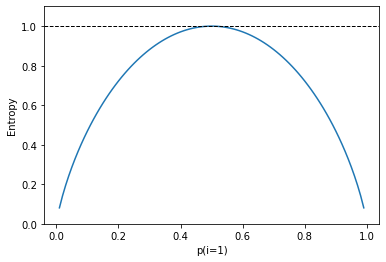

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.show()

### Gini Impurity

$$ 1-\sum_i p(i|x_j)^2 $$

$$ \sum_{i=1}^C p(i|x_j)(1-p(i|x_j)) $$

where $x_j$ is the feature at a splitting node and $p(i|x_j)$ is the proportion/frequency/probability of the samples that belong to class i for the particular node. $C$ is the number of unique class labels.

This **calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly**. If all the elements are linked with a single class then it can be called pure. The Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. All the elements belong to a specified class. 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.

While designing the decision tree, the features possessing the least value of the Gini Index would get preferred.

Gini Index vs Entropy:

1. The Gini Index facilitates the **bigger distributions** so easy to implement whereas the Entropy favors **lesser distributions** having small count with multiple specific values.
2. The method of the Gini Index is used by CART algorithms, in contrast to it, Entropy is used in ID3, C4.5 algorithms.


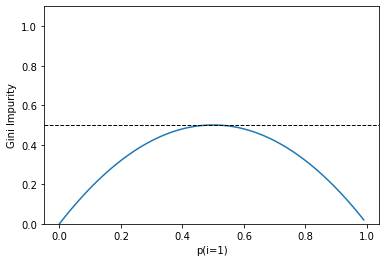

In [2]:
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, gini(x))
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Gini Impurity')
plt.show()

### Misclassification Error

$$ ERR(D) = \frac{1}{n} \sum_{i=1}^n L(\hat{y}^{[i]}, y^{[i]})$$

$$  L(\hat{y}^{[i]}, y^{[i]}) =  \left\{
\begin{array}{ll}
      0 & \hat{y} = y \\
      1 & otherwise \\
\end{array} 
\right. $$

This, in the case of the training set with i class labels , is equal to 

$$ ERR(p) = 1 - max_i\{p(i|x_j)\} $$

for a given node if we use majority voting at this node.

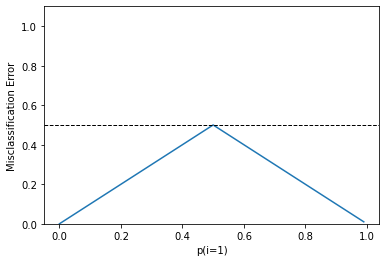

In [3]:
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
err = [error(i) for i in x]
plt.plot(x, err)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Misclassification Error')
plt.show()

### Growing decision trees via Entropy or Gini Impurity (instead of Misclassification Error)
$$ GAIN(D, x_j) = I(D) - \sum_{v\in Values(x_j)} \frac{|D_v|}{|D|}I(D_v) $$

where I is a function that measures the impurity of a given node. If I is defined as the Entropy measure (H) we defined earlier, this equation is equal to the information gain equation used in classification trees.

Instead of using Entropy as an impurity measure, the misclassification error ERR seems to be another reasonable choice. However, examining the below plot shows that Entropy and Gini are parabolic unlike misclassification error. This concave shape means that the weighted average ntropy of the child nodes is always smaller than the entropy of the parent node. 

This means that we can always find a splitting criterion to continue growing the tree in the case of Entropy and Gini. However, the tree growth might get stumped with ERR as the the error doesn’t improve.

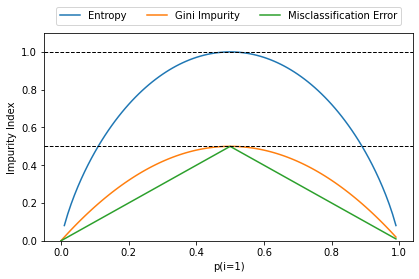

In [4]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab in zip([ent, gini(x), err], 
                  ['Entropy', 'Gini Impurity', 'Misclassification Error']):
    line, = ax.plot(x, i, label=lab)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.show()

Avoid Overfitting in Decision Trees
-----------------------------------

Overfitting is one of the key challenges in a tree-based algorithm. If no limit is set, it will give 100% fitting, because, in the worst-case scenario, it will end up making a leaf node for each observation. Overfitting is typically addressed through **pruning**.

## Pruning 
### Pre-pruning 
This is essentially early-stopping and involves setting constraints on tree size

Parameters play an important role in tree modeling. Overfitting can be avoided by using various parameters that are used to define a tree.

1.  #### Minimum samples for a node split
    1.  Defines the minimum number of observations that are required in a node to be considered for splitting. (this ensures above mentioned worst-case scenario).
    2.  A higher value of this parameter prevents a model from learning relations that might be highly specific to the particular sample selected for a tree.
    3.  Too high values can lead to under-fitting hence, it should be tuned properly using cross-validation.
    
2.  #### Minimum samples for a leaf node

    1.  Defines the minimum observations required in a leaf. (Again this also prevents worst-case scenarios)
    2.  Generally, lower values should be chosen for imbalanced class problems as the regions in which the minority class will be in majority will be of small size.
    
3.  #### Maximum depth of the tree (vertical depth)

    1.  Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
    2.  Should be tuned properly using Cross-validation as too little height can cause underfitting.
    
4. #### Maximum number of leaf nodes

    1.  The maximum number of leaf nodes or leaves in a tree.
    2.  Can be defined in place of max_depth. Since binary trees are created, a depth of $d$ would produce a maximum of $2^d$ leaves.
    
5.  #### Maximum features to consider for a split

    1.  The number of features to consider while searching for the best split. These will be randomly selected.
    2.  As a thumb-rule, the square root of the total number of features works great but we should check up to 30--40% of the total number of features.
    3.  Higher values can lead to over-fitting but depend on case to case.
    
### Post-pruning 
This is when you grow a full tree, then remove nodes
- Reduced error pruning - removes nodes via validation set evaluation 
- Can convert trees to rules first and then prune the rules.

## Scikit-learn demo

In [5]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


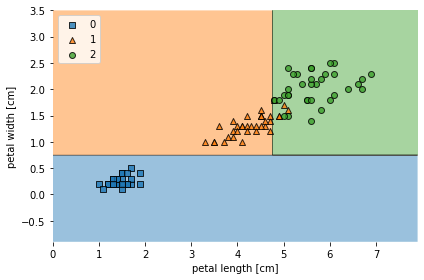

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
y_pred = tree.predict(X_test)

In [11]:
print("Accuracy:{}".format(tree.score(X_test, y_test)))

Accuracy:0.9555555555555556


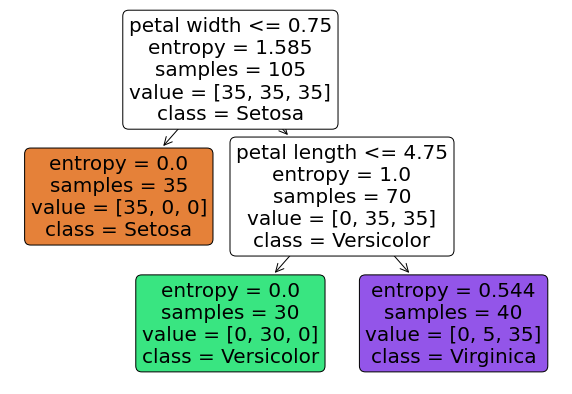

In [12]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()